# Randon Pairing vs Power Pairing e Page Rank vs Trivial Rank
Neste documento, queremos investigar qual é o melhor jeito de fazer o rankeamento e o pairing, para o Campeonato Fluminense de Debates

In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
import random
%matplotlib inline

In [3]:
duplas = 32
rodadas = 4

In [4]:
power = [random.random() for i in range(duplas)]
power.sort(reverse=True)

## Paring aleatório e trivial rank

In [60]:
def campeonato_aleatorio_padrao(power, rodadas): #Trivial Rank, Random Pairing
    duplas = len(power)
    tabela = [0 for i in range(duplas)]
    def gerar_rodada_aleatoria(duplas): 
        numeros = list(range(duplas))
        random.shuffle(numeros)
        rodada = [[]]
        while len(numeros) != 0:
            if len(rodada[-1]) != 4:
                rodada[-1].append(numeros.pop())
            else:
                rodada.append([])
        return rodada
    for i in range(rodadas):
        rodada = gerar_rodada_aleatoria(duplas)
        for sala in rodada:
            A = [(power[dupla]+0.05*np.random.randn(), dupla) for dupla in sala]
            A.sort(key = lambda x: x[1])
            tabela[A[0][1]] += 3
            tabela[A[1][1]] += 2
            tabela[A[2][1]] += 1
    return tabela

In [61]:
A = [[] for i in range(duplas)]
for i in range(1000):
    tabela = campeonato_aleatorio_padrao(power, rodadas) #executa um campeonato e gera a tabela
    tabela1 = [(tabela[i], i) for i in range(len(tabela))] #ordena
    tabela1.sort(key=lambda x: x[0], reverse=True)
    tabela2 = tabela[:]
    tabela2.sort(reverse=True)
    for item in tabela1:
        A[item[1]].append(tabela2.index(item[0]))

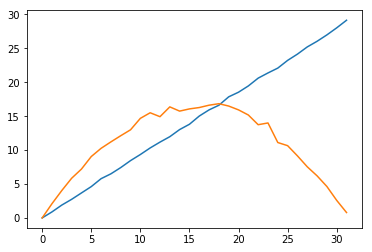

In [62]:
a = [(sum(item)/len(item), np.var(item)) for item in A]
plt.plot(a)
plt.show()

A variância é maior justamente no meio, onde menos gostaríamos que houvesse variância.

In [78]:
varianciatotal = [i[1] for i in a]
sum(varianciatotal)

345.82566700000007

## Power paring, trivial ranking
### Caso 1: Primeira rodada aleatória, demais por power paring aleatório.

In [63]:
def campeonato_power_paired_rank_padrao(power, rodadas):
    duplas = len(power)
    tabela = [0 for i in range(duplas)]
    def gerar_rodada_power_paired(duplas, tabela): 
        if sum(tabela)==0:
            numeros = list(range(duplas))
            random.shuffle(numeros)
            rodada = [[]]
            while len(numeros) != 0:
                if len(rodada[-1]) != 4:
                    rodada[-1].append(numeros.pop())
                else:
                    rodada.append([])
            return rodada
        else:
            tabela1 = [(tabela[i], i) for i in range(duplas)]
            tabela1.sort(key=lambda x: x[0], reverse=True)
            numeros = [i[1] for i in tabela1]
            rodada = [[]] 
            while len(numeros) != 0:
                if len(rodada[-1]) != 4:
                    rodada[-1].append(numeros.pop())
                else:
                    rodada.append([])
            return rodada
    for i in range(rodadas):
        rodada = gerar_rodada_power_paired(duplas, tabela)
        for sala in rodada:
            A = [(power[dupla]+0.05*np.random.randn(), dupla) for dupla in sala]
            A.sort(key = lambda x: x[1])
            tabela[A[0][1]] += 3
            tabela[A[1][1]] += 2
            tabela[A[2][1]] += 1
    return tabela

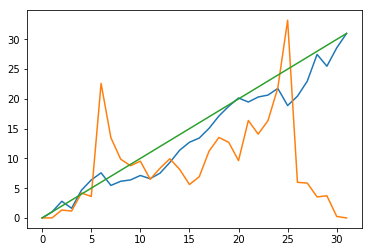

In [73]:
B = [[] for i in range(duplas)]
for i in range(1000):
    tabela = campeonato_power_paired_rank_padrao(power, rodadas) #executa um campeonato e gera a tabela
    tabela1 = [(tabela[i], i) for i in range(len(tabela))] #ordena
    tabela1.sort(key=lambda x: x[0], reverse=True)
    tabela2 = tabela[:]
    tabela2.sort(reverse=True)
    for item in tabela1:
        B[item[1]].append(tabela2.index(item[0]))
b = [(sum(item)/len(item), np.var(item), B.index(item)) for item in B]
plt.plot(b)
plt.show()

É interessante que a variância seja menor justamente no break e mesmo havendo algumas duplas que não ficam no seu lugar de fato na maioria das vezes, é pouco importante porque acontece justamente longe do break.

In [79]:
varianciatotal = [i[1] for i in b]
sum(varianciatotal)

288.25460899999996

Aqui a variância total do campeonato é menor que no outro caso.

### Caso 2: primeira rodada aleatória, demais power-paired, última aleatória

In [58]:
def campeonato_power_paired_rank_padrao2(power, rodadas):
    duplas = len(power)
    tabela = [0 for i in range(duplas)]
    def gerar_rodada_power_paired(duplas, tabela): 
        if sum(tabela)==0 or sum(tabela)==(6*(duplas/4)*(rodadas-1)):
            print(sum(tabela))
            numeros = list(range(duplas))
            random.shuffle(numeros)
            rodada = [[]]
            while len(numeros) != 0:
                if len(rodada[-1]) != 4:
                    rodada[-1].append(numeros.pop())
                else:
                    rodada.append([])
            return rodada
        else:
            tabela1 = [(tabela[i], i) for i in range(duplas)]
            tabela1.sort(key=lambda x: x[0], reverse=True)
            numeros = [i[1] for i in tabela1]
            rodada = [[]] 
            while len(numeros) != 0:
                if len(rodada[-1]) != 4:
                    rodada[-1].append(numeros.pop())
                else:
                    rodada.append([])
            return rodada
    for i in range(rodadas):
        rodada = gerar_rodada_power_paired(duplas, tabela)
        for sala in rodada:
            A = [(power[dupla]+0.05*np.random.randn(), dupla) for dupla in sala]
            A.sort(key = lambda x: x[1])
            tabela[A[0][1]] += 3
            tabela[A[1][1]] += 2
            tabela[A[2][1]] += 1
    return tabela

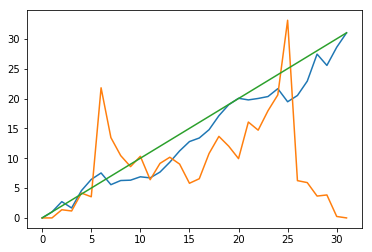

In [74]:
C = [[] for i in range(duplas)]
for i in range(1000):
    tabela = campeonato_power_paired_rank_padrao(power, rodadas) #executa um campeonato e gera a tabela
    tabela1 = [(tabela[i], i) for i in range(len(tabela))] #ordena
    tabela1.sort(key=lambda x: x[0], reverse=True)
    tabela2 = tabela[:]
    tabela2.sort(reverse=True)
    for item in tabela1:
        C[item[1]].append(tabela2.index(item[0]))
c = [(sum(item)/len(item), np.var(item), C.index(item)) for item in C]
plt.plot(c)
plt.show()

In [80]:
varianciatotal = [i[1] for i in c]
sum(varianciatotal)

290.62048799999997